In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import pycarrot as pc

%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

sns.set_theme()

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [2]:
df = pd.read_csv(
    "./data/abalone/abalone.data",
    names=[
        "sex",
        "length",
        "diameter",
        "height",
        "whole weight",
        "shucked weight",
        "viscera weight",
        "shell weight",
        "rings",
    ],
)
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.tail()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.shape

(4177, 9)

In [4]:
pc.feat_analysis.get_distribution(df)

COLUMN: mean radius
-----------------------------
Dtype: float64
Unique values: 456
np.nan count: 0
Most common values: [12.34 11.71 12.46 13.05 10.26]

COLUMN: mean texture
-----------------------------
Dtype: float64
Unique values: 479
np.nan count: 0
Most common values: [20.52 16.85 16.84 19.83 14.93]

COLUMN: mean perimeter
-----------------------------
Dtype: float64
Unique values: 522
np.nan count: 0
Most common values: [ 82.61  87.76 134.7   93.97  82.69]

COLUMN: mean area
-----------------------------
Dtype: float64
Unique values: 539
np.nan count: 0
Most common values: [ 512.2 1075.   582.7  399.8  641.2]

COLUMN: mean smoothness
-----------------------------
Dtype: float64
Unique values: 474
np.nan count: 0
Most common values: [0.1007 0.115  0.1054 0.1075 0.1063]

COLUMN: mean compactness
-----------------------------
Dtype: float64
Unique values: 537
np.nan count: 0
Most common values: [0.1147  0.1206  0.07698 0.05743 0.03834]

COLUMN: mean concavity
-----------------------

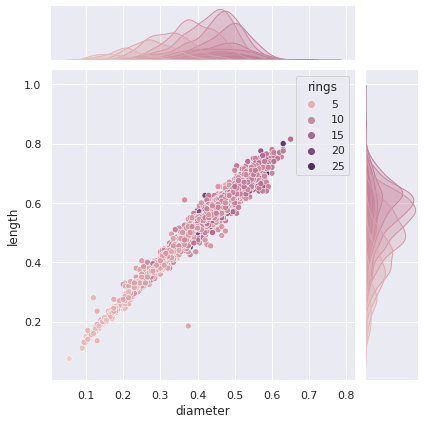

In [8]:
sns.jointplot(data=df, x="diameter", y="length", hue="rings")

## Training

In [15]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [16]:
config = pc.init_config("./config.yml")
config

{'modelling': {'target_clf': 'rings',
  'numeric_cols': ['length',
   'diameter',
   'height',
   'whole weight',
   'shucked weight',
   'viscera weight',
   'shell weight'],
  'categorical_cols': ['sex']}}

In [17]:
setup, X_sample, y_sample = pc.modelling.prepare_data(
    train_data=df,
    config=config,
)

In [18]:
metric = "f1"

In [24]:
compare_df, model_dict = pc.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        "dt",
        "rf",
        "ridge",
        "perceptron",
        "passive-aggressive",
        "extratree",
        "extratrees",
        "knn",
        "nb",
        "linearsvc",
        "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

/home/george/Desktop/pycarrot/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/george/Desktop/pycarrot/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/george/Desktop/pycarrot/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s)
0,knn,0.225,NaN,NaN,NaN,NaN,0.018
1,nb,0.236,NaN,NaN,NaN,NaN,0.025
2,extratree,0.182,NaN,NaN,NaN,NaN,0.032
3,ridge,0.233,NaN,NaN,NaN,NaN,0.04
4,dt,0.195,NaN,NaN,NaN,NaN,0.133
5,passive-aggressive,0.176,NaN,NaN,NaN,NaN,0.221
6,perceptron,0.152,NaN,NaN,NaN,NaN,0.268
7,lr,0.26,NaN,NaN,NaN,NaN,2.001
8,extratrees,0.241,NaN,NaN,NaN,NaN,2.586
9,rbfsvc,0.27,NaN,NaN,NaN,NaN,2.628


In [11]:
model_dict

{'lr': LogisticRegression(),
 'dt': DecisionTreeClassifier(),
 'rf': RandomForestClassifier(),
 'ridge': RidgeClassifier(),
 'perceptron': Perceptron(),
 'passive-aggressive': PassiveAggressiveClassifier(),
 'extratree': ExtraTreeClassifier(),
 'extratrees': ExtraTreesClassifier(),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'linearsvc': LinearSVC(),
 'rbfsvc': SVC()}

In [16]:
algorithm, reference_metric = compare_df.loc[compare_df["algorithm"] == "extratrees", ["algorithm", metric]].values[0]
best_feature_list = pc.modelling.reduce_feature_space(setup, algorithm, metric, reference_metric, acceptable_loss=0.5)
best_feature_list

New metric: 0.979, worst feature: area error
Updating reference metric...
New metric: 0.981, worst feature: mean fractal dimension
Updating reference metric...
New metric: 0.979, worst feature: mean concave points
New metric: 0.981, worst feature: texture error
New metric: 0.982, worst feature: symmetry error
Updating reference metric...
New metric: 0.979, worst feature: worst radius
New metric: 0.98, worst feature: mean symmetry
New metric: 0.979, worst feature: worst symmetry
New metric: 0.979, worst feature: worst concave points
New metric: 0.979, worst feature: concavity error
New metric: 0.979, worst feature: mean perimeter
New metric: 0.979, worst feature: mean compactness
New metric: 0.983, worst feature: worst fractal dimension
Updating reference metric...
New metric: 0.982, worst feature: mean area
New metric: 0.982, worst feature: concave points error
New metric: 0.982, worst feature: worst compactness
New metric: 0.985, worst feature: worst perimeter
Updating reference metri

['mean texture',
 'mean smoothness',
 'mean concavity',
 'perimeter error',
 'smoothness error',
 'compactness error',
 'fractal dimension error',
 'worst texture',
 'worst area',
 'worst smoothness',
 'worst concavity']